# Exotic Distributions

The distribution of the target variable is of paramount importance when modelling.

When you come across data with a target distribution very far from a Normal Distribution, there are a few strategies available:

- If you are only interested in **prediction**, you can use **nonlinear models** (eg. machine learning) which doesn't care about distributions.

If you need to maintain interpretability, you have a few choices:

- Try to modify the target to be closer to Normal

- Use a model which assumes a non-normal distribution.

Logit and Probit regressions were examples of this, assuming a [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) (distribution of binary outcomes).

We won't have time to dive deeply into each exotic distribution model -- each one has complexity and nuance in interpretation and testing. We just want to quickly surveil what's out there. 

Here are a few.


# 1. Poisson Distribution

The Poisson distribution models counts of things. This could be:

- The number of children people have

- The number of letters you got in the mail today

etc.

Since these events are distributed in a non-normal fashion, the Poisson distribution is built to model them. Unlike the normal distribution, which is parametrized by two numbers (the **mean** and the **variance** of the bell curve) the Poisson is only parametrized by a single number, the lambda:

![](poisson.png)

We can do Poisson Regression from statsmodels:

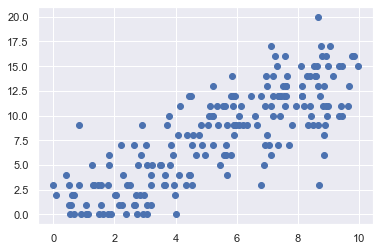

<AxesSubplot:>

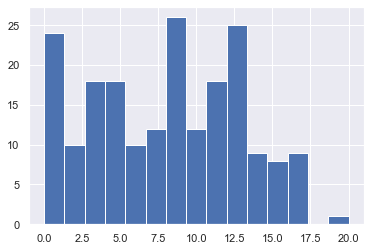

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()

x = 10 * rng.rand(200)
y = np.floor(1.5 * x + (3 * rng.randn(200)))
# clip y to non-negative values
y[y < 0] = 0.
plt.scatter(x, y)
plt.show()
pd.Series(y).hist(bins=15)

In [36]:
sm.Poisson(y, sm.add_constant(x)).fit().summary()

Optimization terminated successfully.
         Current function value: 2.547038
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.2870
Time:                        13:17:38   Log-Likelihood:                -509.41
converged:                       True   LL-Null:                       -714.46
Covariance Type:            nonrobust   LLR p-value:                 3.496e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8565      0.074     11.529      0.000       0.711       1.002
x1             0.2003      0.010     19.151      0.000       0.180       0.221
==============================================================================
"""

Few notes:

1. Poisson assumes the variance is equal to the mean ($\lambda$ parameter). This is rarely the case

2. If $\lambda \ge 20$ then the Poisson distribution is roughly equal to the Normal distribution so you might as well use OLS.

So Poisson is only useful for very specific cases: Distributions of non-negative counts with low mean and variance equal to the mean.

# 2. Negative Binomial

The [Negative Binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution) is a generalization of the Poisson distribution which allows for a variance value free from the mean value:

![](negbinomial.gif)

This means the distribution fits an additional **alpha** parameter to the model.

In [37]:
sm.NegativeBinomial(y, sm.add_constant(x)).fit().summary()

Optimization terminated successfully.
         Current function value: 2.539369
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               NegativeBinomial   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.1583
Time:                        13:18:04   Log-Likelihood:                -507.87
converged:                       True   LL-Null:                       -603.41
Covariance Type:            nonrobust   LLR p-value:                 1.860e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8271      0.082     10.077      0.000       0.666       0.988
x1             0.2051      0.012     17.190      0.000       0.182       0.229
alpha          0.0270      0.018      1.506      0.132      -0.008       0.062
==============================================================================
"""

# 3. Zero Inflated Models

Some distributions have a large spike at zero which most distributions can't fit to.

This can be fit to using [Zero Inflated Models](https://en.wikipedia.org/wiki/Zero-inflated_model) which basically fit two distributions at the same time (one binary for the probability of being zero, and one for the rest of the distribution)

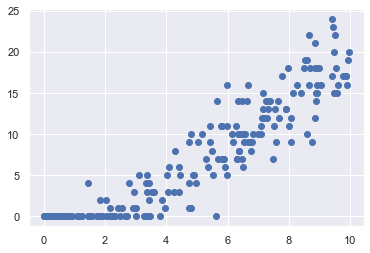

<AxesSubplot:>

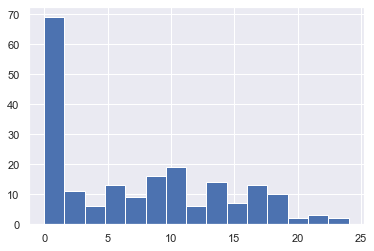

In [70]:
x = 10 * rng.rand(200)
y = np.floor(2.5 * x - 5.5 + (3 * rng.randn(200)))
# clip y to non-negative values
y[y < 0] = 0.
plt.scatter(x, y)
plt.show()
pd.Series(y).hist(bins=15)

In [80]:
est = sm.ZeroInflatedPoisson(y, sm.add_constant(x)).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 2.214640
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18
/Users/mranger/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                       y   No. Observations:                  200
Model:             ZeroInflatedPoisson   Df Residuals:                      198
Method:                            MLE   Df Model:                            1
Date:                 Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3037
Time:                         13:50:16   Log-Likelihood:                -442.93
converged:                        True   LL-Null:                       -636.10
Covariance Type:             nonrobust   LLR p-value:                 5.176e-86
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -1.6147      0.268     -6.028      0.000      -2.140      -1.090
const             0.0949      0.115      0.827      0.408      -0.130       0.320
x1                0.3109      0.015     21.380      0.000       0.282       0.339
=================================================================================
"""

One problem with ZI models are that they're very finicky and brittle (at least in the statsmodels implementation).

I rarely end up using ZI models in practice for this reason and instead my personal solution is to decompose the idea of a ZI model by hand:

# 4. Two Stage modelling

A manual solution to ZI problems is a **two stage** approach:

1. Fit a logit regression to predict if $y = 0$

2. Use the output of this model as a feature input into the another model which predicts on a distribution that fits the nonzero values.

This has to be implemented by hand, however. 

**N.B.** Don't confuse this with [two stage least squares](https://en.wikipedia.org/wiki/Instrumental_variables_estimation) which is a different thing. We might see that one at the end of the course when we tackle causality.


Optimization terminated successfully.
         Current function value: 0.178846
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     610.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.62e-85
Time:                        13:55:06   Log-Likelihood:                -467.28
No. Observations:                 200   AIC:                             940.6
Df Residuals:                     197   BIC:                             950.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4882      0.361     -6.886      0.000      -3.201      -1.776
x              2.7178      0.138     19.637      0.000       2.445       2.991
stage1        -5.4095      1.039     -5.206      0.000      -7.459      -3.360
==============================================================================
Omnibus:                        3.235   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.837
Skew:                           0.234   Prob(JB):                        0.242
Kurtosis:                       3.348   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

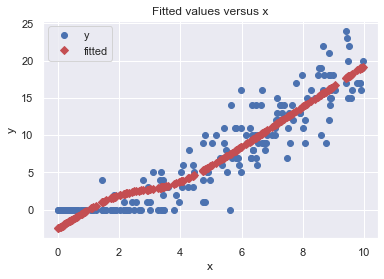

In [84]:
# Stage 1
est1 = sm.Logit((y > 0).astype(int), sm.add_constant(x)).fit()
# Prep Stage 2
X = pd.DataFrame(sm.add_constant(x))
X['stage1'] = est1.predict(X)
X.columns = ['const', 'x', 'stage1']
# Stage 2
est2 = sm.OLS(y, X).fit()
sm.graphics.plot_fit(est2, 1, vlines=False)
est2.summary()

Note the slope in the non-zero part is correct! 

The slope would be biased downward in an OLS model without the two-stage approach:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.90e-81
Time:                        13:55:14   Log-Likelihood:                -480.17
No. Observations:                 200   AIC:                             964.3
Df Residuals:                     198   BIC:                             970.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0246      0.368     -8.209      0.000      -3.751      -2.298
x              2.0680      0.064     32.481      0.000       1.942       2.194
==============================================================================
Omnibus:                        0.903   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.576
Skew:                           0.055   Prob(JB):                        0.750
Kurtosis:                       3.239   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

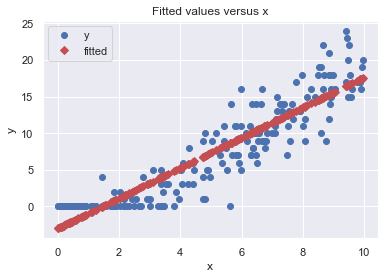

In [85]:
est_lin = sm.OLS(y, X[['const', 'x']]).fit()
sm.graphics.plot_fit(est_lin, 1, vlines=False)
est_lin.summary()

The multi-stage model idea can be played around with to your heart's content:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     454.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           6.02e-88
Time:                        13:51:17   Log-Likelihood:                -457.35
No. Observations:                 200   AIC:                             922.7
Df Residuals:                     196   BIC:                             935.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1994      0.447     -2.682      0.008      -2.081      -0.318
x              2.4646      0.143     17.187      0.000       2.182       2.747
stage1       -16.1262      2.568     -6.281      0.000     -21.190     -11.063
stage1_2      11.5764      2.558      4.525      0.000       6.531      16.622
==============================================================================
Omnibus:                        6.207   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                8.492
Skew:                           0.166   Prob(JB):                       0.0143
Kurtosis:                       3.953   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

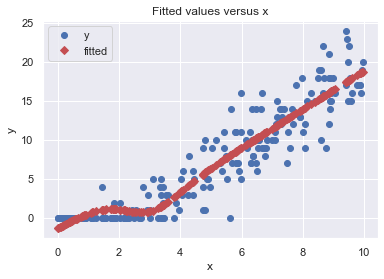

In [82]:
X['stage1_2'] = X.stage1 ** 2

est3 = sm.OLS(y, X).fit()
sm.graphics.plot_fit(est3, 1, vlines=False)
est3.summary()

# 4. Quantile Regression

Linear regression uses least squares to calculate the **conditional mean** of the target across different values of the features.

Quantile regression estimates the **conditional median** of the target. This makes it a robust approach to model distributions with massive amounts of outliers.

![](quantreg.png)

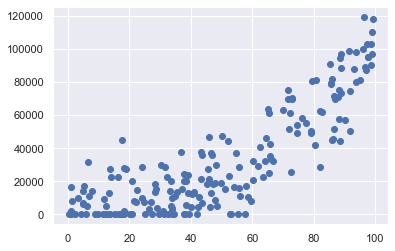

<AxesSubplot:>

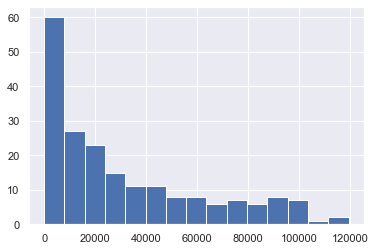

In [94]:
x = 100 * rng.rand(200)
y = np.floor(x ** 2.5 - 5.5 - (15000 * rng.randn(200)))
# clip y to non-negative values
y[y < 0] = 0.
plt.scatter(x, y)
plt.show()
pd.Series(y).hist(bins=15)

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.6112
Model:                       QuantReg   Bandwidth:                       9311.
Method:                 Least Squares   Sparsity:                    4.111e+04
Date:                Sun, 17 Jan 2021   No. Observations:                  200
Time:                        14:08:42   Df Residuals:                      197
                                        Df Model:                            2
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.106e+04   4057.702      2.726      0.007    3060.468    1.91e+04
x           -412.3961    186.322     -2.213      0.028    -779.837     -44.955
x2            13.9115      1.783      7.801      0.000      10.394      17.428
==============================================================================

The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

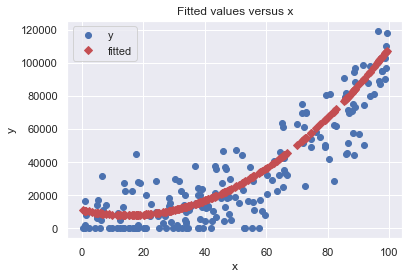

In [102]:
X = pd.DataFrame(sm.add_constant(x))
X.columns = ['const', 'x']
X['x2'] = X['x'] ** 2

est_lin = (sm.QuantReg(y, X)
              # q is the quantile we fit to
              .fit(q=0.65)
)
sm.graphics.plot_fit(est_lin, 1, vlines=False)
est_lin.summary()